**<span style="font-family:KerkisSans; font-size:2em;">Practical Data Science</span>**

**<span style="font-family:KerkisSans; font-size:2em;">Assignment I</span>**

**<span style="font-family:KerkisSans; font-size:2em;">Collect & explore data about the recent pandemic from Twitter</span>**

<span style="font-family:KerkisSans; font-size:2em; color: black">M.Sc. Data Science | </span>
<span style="font-family:KerkisSans; font-size:2em; color: black">2020-2021</span>

<span style="font-family:KerkisSans; font-size:1.5em; color: black">Ioannis Karampinis</span>

# (a) Connect to Twitter [1pt]
* Create a Twitter app and login with your credentials.

In [1]:
### ====== Initialization ====== ###
### ---------------------------- ###

# Import libraries
import tweepy
from Twitter_api_config import config # Import my credentials from a separate file in the form of a dictionary.
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import re
from itertools import chain
%matplotlib inline

# Creating the API and establishing connection.
auth = tweepy.OAuthHandler(config['api_key'], config['api_secret_key'])
auth.set_access_token(config['access_token'], config['access_token_secret'])

api = tweepy.API(auth)

# (b) Collect data by building a stream [2 pts]
* Create a stream listener.
* Monitor the given COVID-19 related terms. 
* Collect 50k statuses and save to a list called covid_tweets.

In [2]:
terms = ['covid19', '#ncov2019', 'Covid_19', '#conronaviruspandemic', 'COVID-19', '#caronavirus', 
         '#infocoronavirus', 'coronavirusupdate', 'carona virus', '#coronavirues', '#Coronovirus', 
         '#2019nCoV', '#Coronvirus', '#Coronavirus', 'covid-19', 'Coronavirus', '#caronavirusoutbreak', 
         'covid', '#CoronaVirusUpdate', '#Corvid19virus', '#covid', 'coronavirus', '#CoronaVirus', 'nCoV', 
         'covid 19', '#nCoV2019', '#covid_19', '#coronavirusupdates', '#COVIDー19', '#2019nCov', '#CoronaAlert', 
         '#coronavirus', 'SARS-CoV-2', '#nCoV', '#coronanews', '#COVID', '2019nCoV', '#CoronavirusOutbreak', 
         '#coronapocolypse', '#COVID19', '#codvid19', '#codvid_19', 'coronavirus outbreak']

In [3]:
# ### ====== Creating the stream listener ====== ###
# ### ------------------------------------------ ###



# Overwrite the method 'on_status' from Tweepy's StreamListener class. 
covid_tweets = []
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        covid_tweets.append(status)
        if len(tweet_list)%5000==0:
            tock = time.time()
            print('Reached {} tweets. Elapsed time = {:.2f}s'.format(len(covid_tweets), tock-tick))
        if len(covid_tweets)>=50000:
            print('Collected 50.000 tweets! Returning...')
            return False 

        
tick = time.time()
CovidStreamListener = MyStreamListener()
CovidStream = tweepy.Stream(auth = api.auth, listener=CovidStreamListener)
CovidStream.filter(track=terms)




### Data safekeeping ###
### ---------------- ###
# write down which columns we wish to keep.
columns = ['created_at', 'place', 'lang', 'text', 'screen_name', 'followers_count',
           'statuses_count', 'location']

# Parse all the tweets and add the required columns to our 'data'.
for tweet in covid_tweets:
    data['created_at'].append(tweet._json['created_at'])
    data['place'].append(tweet._json['place'])
    data['lang'].append(tweet._json['lang'])
    data['text'].append(tweet._json['text'])
    data['screen_name'].append(tweet._json['user']['screen_name'])
    data['followers_count'].append(tweet._json['user']['followers_count'])
    data['statuses_count'].append(tweet._json['user']['statuses_count'])
    data['location'].append(tweet._json['user']['location'])
data.to_csv('excel_tweets.csv') # save them to as a csv file, for safekeeping.

# (c) Create a dataframe [1 pt]
* Put all the collected tweets in a dataframe.
* As columns of the dataframe keep only the following attributes: `created_at`, `place`, `lang` and `text`. Also, the `screen_name`, `followers_count`, `statuses_count`, and `location` of the `user`.  
* Make sure that any column with dates is treated as such by the dataframe.

In [4]:
### Read the saved data from the file, while simultaneously parsing the dates in the appropriate format.
data = pd.read_csv('excel_tweets.csv', parse_dates=['created_at'], usecols=columns)
data.head()

,created_at,place,lang,text,screen_name,followers_count,statuses_count,location
0,2020-10-22 08:24:07+00:00,NaN,en,"RT @OfficeforSandS: Keep fireworks, tapers and...",IanYoungBEIS,136,606,NaN
1,2020-10-22 08:24:07+00:00,NaN,en,@IanMCohen @mountainthunder @Evl_controller @J...,HatterLola,61,80,NaN
2,2020-10-22 08:24:07+00:00,NaN,en,RT @Nidhi: It is the government’s job and resp...,251tktk,363,90378,"New Delhi, India"
3,2020-10-22 08:24:07+00:00,NaN,en,Red Teaming at Andoks Store on COVID-19 health...,PNPTublay,1363,5501,Tublay Benguet
4,2020-10-22 08:24:07+00:00,NaN,fr,Coronavirus à #Lyon : une nouvelle métropole d...,pictanews,21069,189994,Lyon


# (d) Exploratory analysis [3 pts]
* Report the number of unique: users, locations, and users mentioned within the tweets.
* How many tweets (%) had their place attribute empty.
* Plot the distribution of languages (barplot).
* Plot the number of tweets per minute, from the minute of the first to the minute of the last tweet that was collected (hint: use `dt`).
* Plot the number of tweets per minute for the 3 most frequently mentioned places. Discriminating between the three (e.g., using hue) is preferred but not requested.

In [5]:
### ===== Counting unique users mentioned in the tweets, including retweets ===== ###
### ---------------------------------------------------------------------------------- ###

### Create a regular expression to detect any username in a text.


#regex_users = "(?<!RT )"  # Excludes preceeding 'RT ' strings that correspond to re-tweets, 
                     # via the so-called Negative Lookbehind. We would use this if retweets didn't count as mentions.

# Taken as is from the slides.
regex_users = "@"
regex_users += "["
regex_users += "0-9"
regex_users += "a-z"
regex_users += "A-Z"
regex_users += "_"
regex_users += "\-"
regex_users += "."
regex_users += "]"
regex_users += "+"

usernames = re.compile(regex_users)
# Apply the findall function on each separate tweet, i.e. the whole column data['text']. This returns a Series object
# where each entry is a list containing all the users mentioned in the tweet.
users_mentioned_lists = data.text.apply(func=usernames.findall)

# Create a series where we will put every user mentioned (even the duplicates) and then find the unique entries in it.
all_users_mentioned = pd.Series(data=list(chain(*users_mentioned_lists)))

### ===== Printing ===== ###
### -------------------- ###
print('Number of unique authors: {}'.format(data.screen_name.nunique()))
print('Number of unique locations (NaN\'s not counted): {}'. format((data.place.nunique()))) 
print('Number of unique users mentioned (including re-tweets): {}'.format(all_users_mentioned.nunique()))
print('{:.2f}% of tweets had their "place" attribute empty.'.format(sum(pd.isna(data.place))/500))

Number of unique authors: 39109
Number of unique locations (NaN's not counted): 329
Number of unique users mentioned (including re-tweets): 16151
99.11% of tweets had their "place" attribute empty.


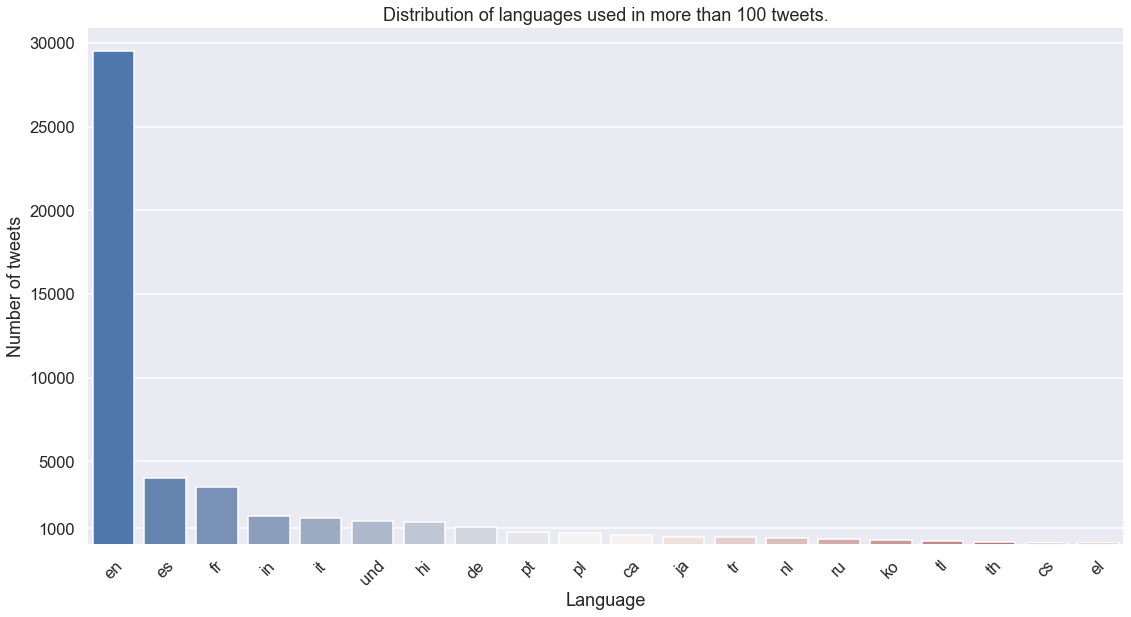

In [6]:
### ===== Plotting distribution of languages ===== ###
### ---------------------------------------------- ###
# Plotting the number of times a language is used to write a tweet. A threshold of number of times = 100 
# is enforced, thus ignoring languages that appear less than that.


# Count the values each language is used and store them in the dataframe. By default, this has the languages
# as its index, so we reset it to add languages as a column.
languages = pd.DataFrame(data= data.lang.value_counts().reset_index())
languages.rename(columns={languages.columns[0]:'language', languages.columns[1]:'count'}, inplace=True)                       
                        

sns.set_theme(style="darkgrid", context="talk")
fig1 = plt.figure(figsize=(16, 8))
axes1=fig1.add_axes([0.1, 0.1, 0.9, 0.9])
axes1.set_yticks([1000, 5000, 10000, 15000, 20000, 25000, 30000])
fig_plot = sns.barplot(x="language", y="count", data=languages[languages['count']>=100], palette="vlag", ax=axes1)
axes1.set_ylabel(ylabel='Number of tweets')
axes1.set_xlabel(xlabel='Language')
fig_plot.set_xticklabels(labels=fig_plot.get_xticklabels(), rotation=45)
axes1.set_title('Distribution of languages used in more than 100 tweets.')
plt.show()

<p style='text-align: justify;'> We now create a variable that stores, for each tweet, the minute it was created. We know that the collection process lasted around 25 minutes. However, it could very well be the case that the 'minute' attribute of the last tweet is less than the corresponding attribute of the last tweet, if, say we started at 8:50pm and ended at around 9:15 pm. And this last case needs special treatment. In any case, we store the minute, starting from 1, that a tweet was created in the variabble 'minute_created'. </p>

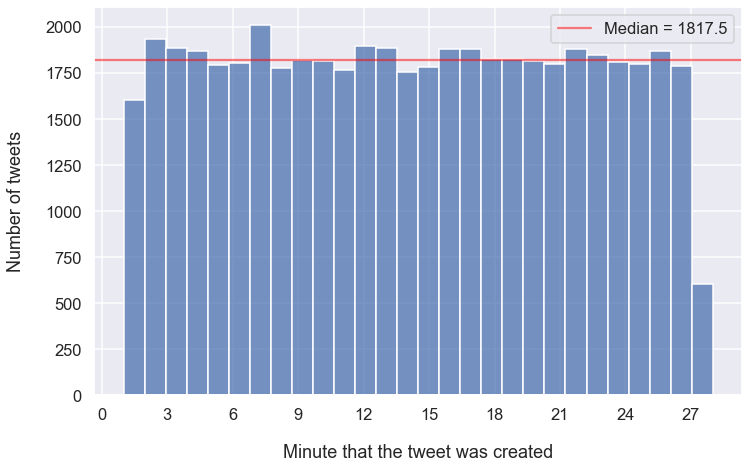

In [7]:
### ===== Plotting distribution of tweets/minute ===== ###
### -------------------------------------------------- ###


# We consider the case mentioned above, where the hour we started isn't the same as when we finished. We add 
# 60 minutes to the 'minute_created' Series for each hour that passed. 
minute_created = data.created_at.dt.minute + 60*(data.created_at.dt.hour - data.created_at.min().hour )
minute_created = minute_created - minute_created.min() + 1  # 'Normalize' the variable, making it start at 1.
data['minute_created'] = minute_created  # add the column to the data

sns.set_theme(style="darkgrid", context="talk")
fig2 = plt.figure(figsize=(10, 6))
axes2=fig2.add_axes([0.1, 0.1, 0.9, 0.9])
axes2.set_xlabel(xlabel='Minute that the tweet was created', labelpad=20)
axes2.set_xticks(range(0, minute_created.max(),3))
axes2.set_ylabel(ylabel='Number of tweets', labelpad=20)
sns.histplot(minute_created, bins=minute_created.nunique(),ax=axes2)
median = data.groupby(by=data.minute_created).count().median().created_at
axes2.axhline(y=median, label='Median = {:.1f}'.format(median), c='red', alpha=0.5)
axes2.legend()
plt.show()

In [8]:
### ===== Plotting distribution of tweets/minute for the 3 most mentioned places ===== ###
### ---------------------------------------------------------------------------------- ###

### Obtain the 3 most mentioned places. The .head() method returns a Series object, whose indexes are the places
### we are looking for. We unpack the returned index object and store the places in a list.
top3_places = [*data.location.value_counts().head(3).index]

### Obtain the data for the top 3 places separately, before combining them

## First for place 1
tweets_place1 = data[data.location==top3_places[0]] # pick data that match the 1st location

# Group them by minute_created, count them and create the new dataframe off of the result.
tweets_place1 = tweets_place1.groupby(by='minute_created').count()

# We reset the index, as the default is the minute_created, which we want as a column. As the second column,
# we chose created_at. We could have use any other, such as text or lang, because EVERY tweet
# has these attributes and so their value is exactly the number of tweets.
tweets_place1 = tweets_place1.reset_index()[['minute_created', 'created_at']]

# Rename the columns
tweets_place1.rename(columns={'minute_created' : 'Minute Created', 'created_at': 'Number of tweets'}, inplace=True)

# Add location column, same for every tweet in this dataset, equal to the top1 location.
tweets_place1['Location'] = pd.Series([top3_places[0] for i in range(len(tweets_place1))])

## Now the same for place 2
tweets_place2 = data[data.location==top3_places[1]]
tweets_place2 = tweets_place2.groupby(by='minute_created').count().reset_index()[['minute_created', 'created_at']]
tweets_place2.rename(columns={'minute_created' : 'Minute Created', 'created_at': 'Number of tweets'}, inplace=True)
tweets_place2['Location'] = pd.Series([top3_places[1] for i in range(len(tweets_place1))])

## And the same for place 3
tweets_place3 = data[data.location==top3_places[2]]
tweets_place3 = tweets_place3.groupby(by='minute_created').count().reset_index()[['minute_created', 'created_at']]
tweets_place3.rename(columns={'minute_created' : 'Minute Created', 'created_at': 'Number of tweets'}, inplace=True)
tweets_place3['Location'] = pd.Series([top3_places[2] for i in range(len(tweets_place1))])

### Now we combine them
# We first append the 3rd to the second , then append the result of this to the 1st.
tweets_top_3_places = tweets_place2.append(tweets_place3, ignore_index=True)
tweets_top_3_places = tweets_place1.append(tweets_top_3_places)
tweets_top_3_places

,Minute Created,Number of tweets,Location
0,1,24,India
1,2,41,India
2,3,28,India
3,4,36,India
4,5,35,India
...,...,...,...
79,24,17,"New Delhi, India"
80,25,6,"New Delhi, India"
81,26,10,"New Delhi, India"
82,27,7,"New Delhi, India"


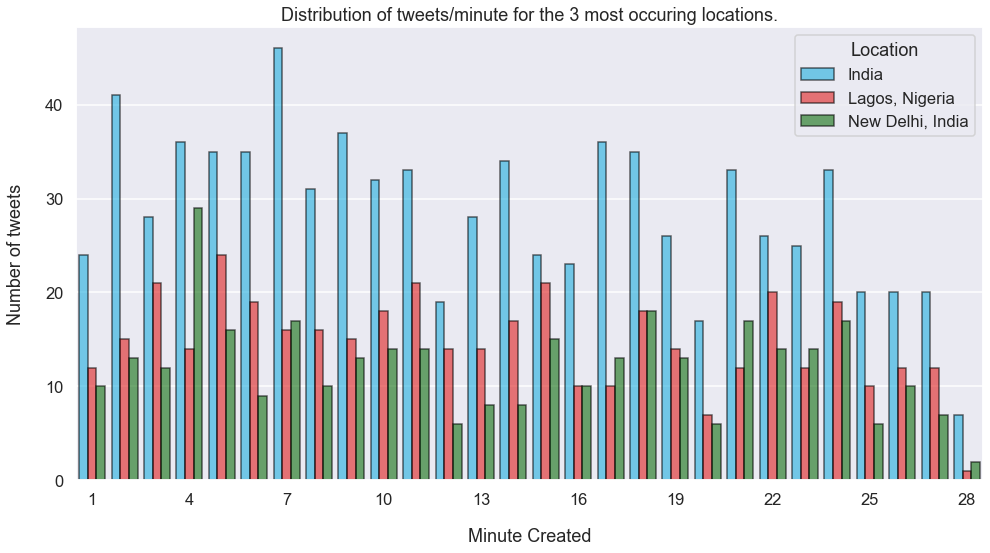

In [9]:
### ===== Plotting ===== ###
### -------------------- ###
fig3 = plt.figure(figsize=(14, 7))
axes3=fig3.add_axes([0.1, 0.1, 0.9, 0.9])

sns.barplot(x='Minute Created', y='Number of tweets', hue='Location',
            palette={top3_places[0]: 'deepskyblue', top3_places[1]: 'red', top3_places[2]:'green'}, alpha=0.6, 
            edgecolor='black',data=tweets_top_3_places, ax=axes3)
axes3.set_xlabel(xlabel='Minute Created', labelpad=20)
axes3.set_xticks(range(0, minute_created.max(),3))
axes3.set_ylabel(ylabel='Number of tweets', labelpad=20)
axes3.set_title('Distribution of tweets/minute for the 3 most occuring locations.')
plt.show()

# (e) Filtering [2pts]
* Assume that simple emoticons can capture the sentiment of a tweet.
* Create one regular expression to detect positive emoticons: `:)`,`:D`, `XD` and one to detect negative emoticons: `:(`, `:'(`, `:((` in the tweets. Report the number of tweets with positive and the number of tweets with negative sentiment.
* Plot the number of tweets with positive and the number of tweets with negative sentiment per minute.

<p style='text-align: justify;'> Here we will use regular expressions for the filtering. We create two separate regular expressions, for positive and negative emoticons respectively. We assert that, in order for an emoticon to be valid, it is not enough that the string itself is valid, but it can't have characters immediately before or after the emoticon. For example, 'XD' inside a URL won't be accepted, and neither will strings of the form ':))))))' </p>

In [10]:

regex_pos = "(?<![^ ]):{1}[\)D]{1}(?![^ ])|(?<![^ ])XD(?![^ ])"
regex_neg = "(?<![^ ]):{1}['\(]?\({1}(?![^ ])"
positive_tweets_func = re.compile(regex_pos)
# Now, we apply our positive tweets function on all the tweets. This returns a Series object,
# where each entry contains a (possibly empty) list of the positive emoticons in the tweet. 
# The boolean value of this list, i.e whether it is empty or not, indicates if the tweet is positive or not.
data['is_positive_tweet'] = data.text.apply(func=positive_tweets_func.findall).apply(func=lambda x: bool(x))

negative_tweets_func = re.compile(regex_neg)
# We do the same for negative tweets.
data['is_negative_tweet'] = data.text.apply(func=negative_tweets_func.findall).apply(func=lambda x: bool(x))


### ==== Printing ==== ###
### ------------------ ###
print('Number number of tweets with positive sentiment: {}'.format(data.is_positive_tweet.sum()))
print('Number number of tweets with negative sentiment: {}'.format(data.is_negative_tweet.sum()))


Number number of tweets with positive sentiment: 14
Number number of tweets with negative sentiment: 19


In [11]:
### Create a sub-dataframe containing all the positive and negative tweets per minute.

# groupby minute_created and sum, thus find ALL tweets created in a given minute. 
# Pick the positive/negative columns
# reset the index to make minute_created a column, not the index as was the default.
tweet_sentiment = data.groupby(by='minute_created').sum()[['is_positive_tweet','is_negative_tweet']].reset_index()

In [12]:
### Combine the 2 columns of 'tweet_sentiment' on top of each other into a longer dataframe, for plotting. 
### First we put all the positive and then the negative tweets.

# First stack the 2 copies of minute_created
tweet_sentiment_long = tweet_sentiment.minute_created.append(tweet_sentiment.minute_created).to_frame()
# Then stack positive and negative tweets/minute
tweet_sentiment_long['Tweets'] = tweet_sentiment.is_positive_tweet.append(tweet_sentiment.is_negative_tweet)
# Finally, create a column that simply contains the sentiment of each tweet as postive/negative.
tweet_sentiment_long['Sentiment'] = pd.Series(['Positive' for i in range(len(tweet_sentiment))])\
                                      .append(pd.Series(['Negative' for i in range(len(tweet_sentiment))]))
tweet_sentiment_long.rename(columns={'minute_created': 'Minute Created'}, inplace=True)
# Visualization
tweet_sentiment_long.head().append(tweet_sentiment_long.tail())

,Minute Created,Tweets,Sentiment
0,1,1,Positive
1,2,0,Positive
2,3,0,Positive
3,4,0,Positive
4,5,0,Positive
23,24,3,Negative
24,25,1,Negative
25,26,0,Negative
26,27,3,Negative
27,28,0,Negative


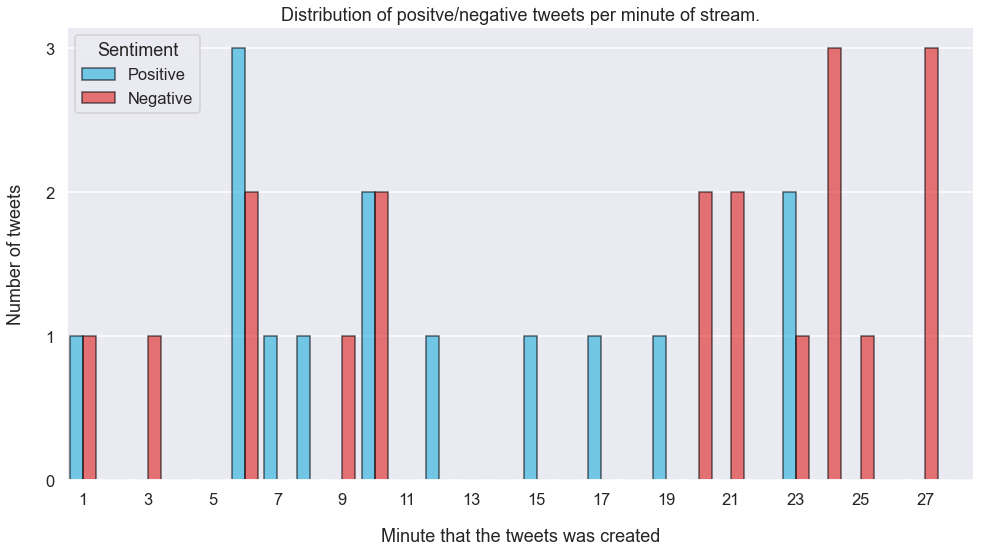

In [13]:
### ===== Plotting ===== ###
### -------------------- ###
sns.set_theme(style="darkgrid", context="talk")
fig4 = plt.figure(figsize=(14,7))
axes4=fig4.add_axes([0.1, 0.1, 0.9, 0.9])

sns.barplot(x='Minute Created', y='Tweets', hue='Sentiment',
             palette={'Positive': 'deepskyblue', 'Negative': 'red'}, alpha=0.6, edgecolor='black',
             data=tweet_sentiment_long, ax=axes4)

axes4.set_yticks([0, 1, 2, 3])
axes4.set_xlabel('Minute that the tweets was created',labelpad=20)
axes4.set_title('Distribution of positve/negative tweets per minute of stream.')
axes4.set_xticks(range(0, minute_created.max(),2))
axes4.set_ylabel(ylabel='Number of tweets', labelpad=20)
plt.show()

# (f) Text pre-processing [1pts]
Use regular expressions to remove:
* Punctuation
* Digits
* New line characters
* URL links
* References to users: `@user`
* Hashtags

In [14]:
### ===== Cleaning the data ===== ###
### ----------------------------- ###

## First create the regular expression. We first create sub-expressions for each particular task.
regex_digits = '[0-9]'  # Numerical digits 
regex_url = '(?<![^ ])https://.'  # URLs
regex_newLine = '\n'  # New line characters
regex_hashtag = '#[^ # \xa0 \n]+'  # Hashtags. Note that hashtags must end at spaces, other hashtags, new lines and
                                   # the so-called non-breaking spaces, \xa0
regex_punct = '\.|,|\?|!|\.{3}|"|:|;|-|\[|\]|\(|\)|\xa0|\{|\}'  # Punctuation symbols in English grammar.


## We sum them and add the or '|' in between.
regex_clean = regex_digits + '|' + regex_users + '|' + regex_url + '|' + regex_newLine + '|' + regex_hashtag + '|'\
              + regex_punct
regex_clean

'[0-9]|@[0-9a-zA-Z_\\-.]+|(?<![^ ])https://.|\n|#[^ # \xa0 \n]+|\\.|,|\\?|!|\\.{3}|"|:|;|-|\\[|\\]|\\(|\\)|\xa0|\\{|\\}'

In [15]:
# Apply the 'cleaner' and then remove any remaining RT's from the start, that corresponded to retweets
cleaned_data = data.text.str.replace(regex_clean, '').apply(func=lambda x: x.strip('RT '))
# Append the column to our dataframe
data['cleaned_data'] = cleaned_data
cleaned_data.head()

0    Keep fireworks tapers and matches away from ch...
1    he testing is hugely inaccurate It is not a co...
2    It is the government’s job and responsibility ...
3    ed Teaming at Andoks Store on COVID health pro...
4    Coronavirus à  une nouvelle métropole de la ré...
Name: text, dtype: object